# Mall Customers Exercises

### 1. Acquire data from the customers table in the mall_customers database.

In [2]:
from imports import *
# set columnns display format
pd.set_option('display.max_columns', None)
# default pandas decimal number display format
pd.options.display.float_format = '{:20,.3f}'.format

In [15]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def new_mall_data():
    '''
    This function reads the Zillow data from the mySQL database into a df.
    '''
    # Create SQL query.
    sql_query = '''
    SELECT * FROM customers;
    '''
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    df = df.drop(columns = 'customer_id')
    return df

def get_mall_data():
    '''
    This function reads in zillow data from Zillow database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('mall_customers.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('mall_customers.csv', index_col=0)
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_mall_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('mall_customers.csv')
        
    return df

In [16]:
df = get_mall_data()

In [17]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 2. Summarize the data (include distributions and descriptive statistics).

#### Shape

In [18]:
df.shape

(200, 4)

#### Info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<span style="color:blue">**No null value in this dataset.**</span>

#### Distribution

In [24]:
df.columns.shape[0]

4

In [61]:
def distribution(df):
    for col in df.columns:
        sns.displot(data = df, x=col)

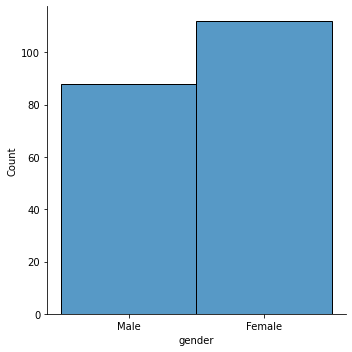

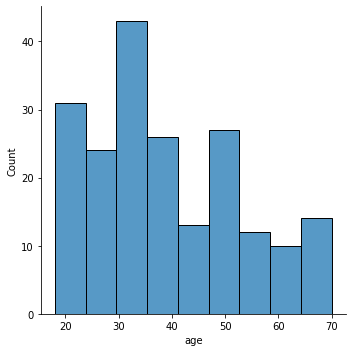

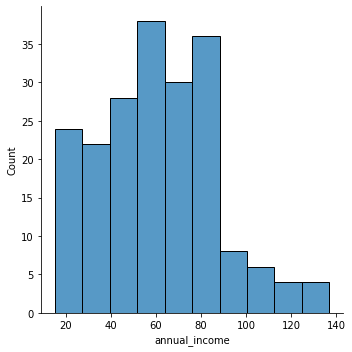

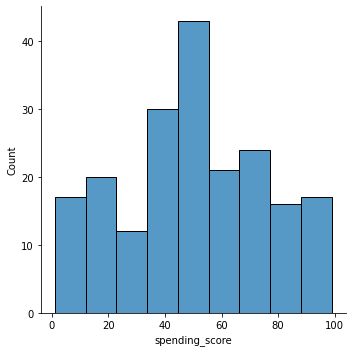

In [62]:
distribution(df)

### 3. Detect outliers using IQR.

#### Tukey Interquartile Range (IQR) Method:
- Calculate IQR
    - Get Q3 and Q1
    - Get difference (q3-q1)
    - Establish "fences":
        - Standard inner fence: k = 1.5
        - Standard outer fence: k = 3.0
        - Upper bound: q3 + k * IQR
        - Lower bound: q1 - k * IQR

In [63]:
def get_upper_outliers(s, k=1.5):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [66]:
get_upper_outliers(df.annual_income).sum()

8.5

### 4. Split data into train, validate, and test.

In [67]:
def split(df):
    '''
    This function drops the customer_id column and then splits a dataframe into 
    train, validate, and test in order to explore the data and to create and validate models. 
    It takes in a dataframe and contains an integer for setting a seed for replication. 
    Test is 20% of the original dataset. The remaining 80% of the dataset is 
    divided between valiidate and train, with validate being .30*.80= 24% of 
    the original dataset, and train being .70*.80= 56% of the original dataset. 
    The function returns, train, validate and test dataframes. 
    '''
    train, test = train_test_split(df, test_size = .2, random_state=123)   
    train, validate = train_test_split(train, test_size=.3, random_state=123)
    
    return train, validate, test

In [69]:
train, validate, test = split(df)

In [70]:
train.shape, validate.shape, test.shape

((112, 4), (48, 4), (40, 4))

### 5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [72]:
dummy_df = pd.get_dummies(df[['gender']], dummy_na=False, drop_first=False)
df = pd.concat([df, dummy_df], axis=1)

### 6. Handles missing values.

In [73]:
# No missing value in this case.

### 7. Scaling

Encapsulate your work in a `wrangle_mall.py` python module.